In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

import image_formats_and_conversions as tools

In [10]:
img = mpimg.imread('football.jpg')
grayscale_image = rgb2gray(img)

## default way

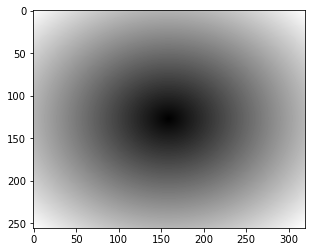

In [3]:
columns, rows = grayscale_image.shape[:2]

katheta = np.linspace(-127, 128, rows)
orizontia = np.linspace(-127, 128, columns)

x,y = np.meshgrid(katheta, orizontia)

apostasi = np.sqrt(np.power(x,2)+np.power(y,2))

katofli = apostasi < 15

plt.imshow(apostasi, cmap='gray')

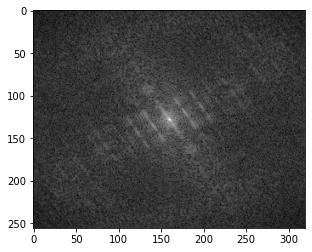

In [4]:
grayscale_image_DFT = np.fft.fft2(grayscale_image)

grayscale_image_centered_DFT = np.fft.fftshift(grayscale_image_DFT)
grayscale_image_centered_DFT_normalized = tools.normalize_fft_image(grayscale_image_centered_DFT)

grayscale_image_centered_DFT_normalized = tools.float_to_uint8(grayscale_image_centered_DFT_normalized)

plt.imshow(grayscale_image_centered_DFT_normalized, cmap='gray')

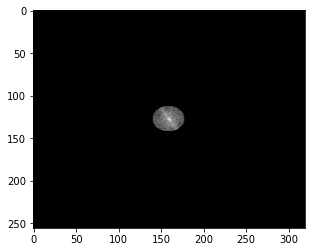

In [5]:
mask_circle = katofli * grayscale_image_centered_DFT
mask_circle_normalized = tools.normalize_fft_image(mask_circle)
mask_circle_final = tools.float_to_uint8(mask_circle_normalized)

plt.imshow(mask_circle_final, cmap='gray')

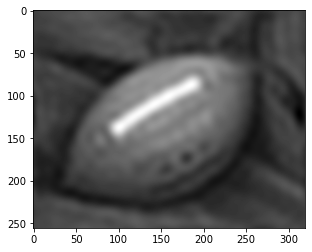

In [7]:
original_filtered_image = np.fft.ifft2(mask_circle)
grayscale_image_inverted_DFT_normalized = tools.normalize_fft_image(original_filtered_image)

plt.imshow(grayscale_image_inverted_DFT_normalized, cmap='gray')

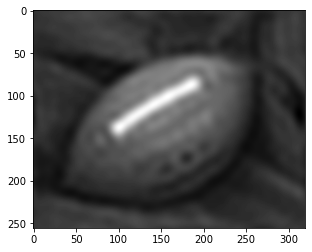

In [11]:
original_filtered_image_normalized = np.abs(original_filtered_image)
original_filtered_image_normalized = tools.float_to_float64(original_filtered_image_normalized)
plt.imshow(original_filtered_image_normalized, cmap='gray')

## try to have less blurring by changing threshold

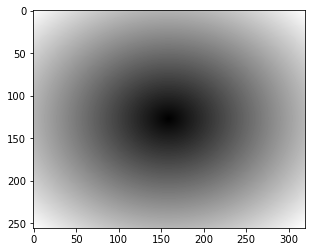

In [18]:
columns, rows = grayscale_image.shape[:2]

katheta_new = np.linspace(-127, 128, rows)
orizontia_new = np.linspace(-127, 128, columns)

w,z = np.meshgrid(katheta_new, orizontia_new)

apostasi_new = np.sqrt(np.power(w,2)+np.power(z,2))

katofli_new = apostasi_new < 45

plt.imshow(apostasi_new, cmap='gray')

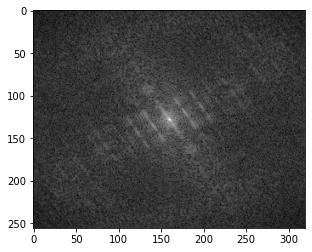

In [19]:
grayscale_image_DFT_new = np.fft.fft2(grayscale_image)

grayscale_image_centered_DFT_new = np.fft.fftshift(grayscale_image_DFT_new)
grayscale_image_centered_DFT_normalized_new = tools.normalize_fft_image(grayscale_image_centered_DFT_new)

grayscale_image_centered_DFT_normalized_new = tools.float_to_uint8(grayscale_image_centered_DFT_normalized_new)

plt.imshow(grayscale_image_centered_DFT_normalized_new, cmap='gray')

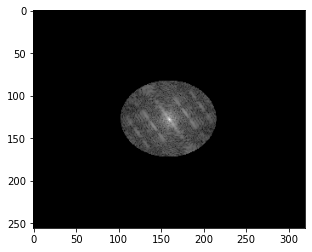

In [21]:
mask_circle_new = katofli_new * grayscale_image_centered_DFT_new
mask_circle_normalized_new = tools.normalize_fft_image(mask_circle_new)
mask_circle_final_new = tools.float_to_uint8(mask_circle_normalized_new)

plt.imshow(mask_circle_final_new, cmap='gray')

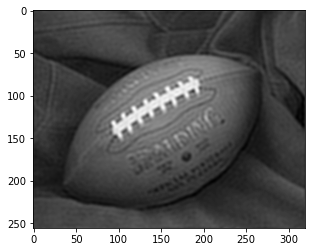

In [23]:
filtered_image_new = np.fft.ifft2(mask_circle_new)
grayscale_image_inverted_DFT_normalized_new = tools.normalize_fft_image(filtered_image_new)

plt.imshow(grayscale_image_inverted_DFT_normalized_new, cmap='gray')

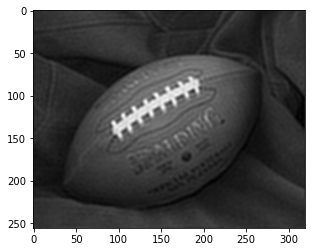

In [24]:
filtered_image_normalized_new = np.abs(filtered_image_new)
filtered_image_normalized_new = tools.float_to_float64(filtered_image_normalized_new)
plt.imshow(filtered_image_normalized_new, cmap='gray')

## show results for comparison

Text(0.5, 1.0, '')

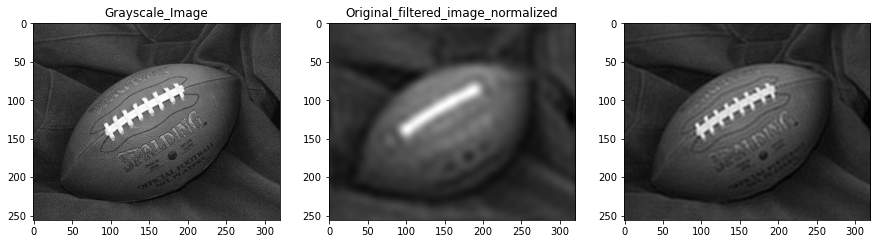

In [25]:
figure1=plt.figure(figsize=(15,10))

subplot1=figure1.add_subplot(1,3,1)
plt.imshow(grayscale_image, cmap="gray")
subplot1.set_title('Grayscale_Image')

subplot1=figure1.add_subplot(1,3,2)
plt.imshow(original_filtered_image_normalized, cmap="gray")
subplot1.set_title('Original_filtered_image_normalized')

subplot1=figure1.add_subplot(1,3,3)
plt.imshow(filtered_image_normalized_new, cmap="gray")
subplot1.set_title('')

